In [1]:
import pandas as pd              # For dataframes
import matplotlib.pyplot as plt  # For plotting data
from apyori import apriori       # For Apriori algorithm
import ast

In [2]:
#pip install apyori

In [3]:
data = pd.read_excel('final_data.xlsx')
data

,NO.TRANSAKSI,DATE,DESCRIPTION,QTY
0,2301011000001,2023-01-01,MADU NSTR SUPER 650ML.,1
1,2301011000001,2023-01-01,STELLA MTC F/C 225ML.REF /12,1
2,2301011000001,2023-01-01,GELAS KOPI BOLA@50,2
3,2301011000001,2023-01-01,MIKA BX IV,3
4,2301011000002,2023-01-01,LAGIE GOLD CM 75G.W/30 LG07507,2
...,...,...,...,...
21929,2312311020099,2023-12-31,INDOMIE SOTO MIE/40 SM,1
21930,2312311020099,2023-12-31,INDOMIE KARI AYAM/40 IKA,1
21931,2312311020099,2023-12-31,INDOMIE KALDU AYAM/40 KA75,3
21932,2312311020099,2023-12-31,SEDAAP MIE KOREAN SPCY40-20234,1


In [4]:
# Menggabungkan kolom DESCRIPTION berdasarkan NO.TRANSAKSI
pd.set_option('display.max_colwidth', None)
grouped_data = data.groupby('NO.TRANSAKSI').agg({
    'DESCRIPTION': lambda x: list(x),  # Menggabungkan DESCRIPTION menjadi list
}).reset_index()

grouped_data

,NO.TRANSAKSI,DESCRIPTION
0,2301011000001,"[MADU NSTR SUPER 650ML., STELLA MTC F/C 225ML.REF /12, GELAS KOPI BOLA@50, MIKA BX IV]"
1,2301011000002,"[LAGIE GOLD CM 75G.W/30 LG07507, NABATI RCCO W.125G/24 300145]"
2,2301011000003,"[SANIA T.TERIGU 1KG. /10, ZEN BARSOAP @4 TEA TREE /24, HAPPY SWEET GULA 1KG/24, MIRATONE CLR SCT 16ML 2BL, SASA- 100G/10PER 112000028, BERAS AGUNG 5KG. /8]"
3,2301011000004,"[SWALLOW NAPTH 100G S-125, SEDAAP MIE KOREAN SP. 40-20261, KINGS/F SARD.SMBL 155G/50 .415, TRESEMME KERATIN 170/18.558380, SAMYANG HOT CHICK.SPICY BOW/16, SEDAAP MIE SINGAPORE SP.40-310, SEDAAP MIE WH.CURRY 40-20134, TAS SPUNBOND TULIP M]"
4,2301011000005,[WALLS MAGNUM V.ALMD/24 .70743]
...,...,...
3549,2312311020095,"[SANIA T.TERIGU 1KG. /10, BONTEH MELATI 330ML/24 D601XX]"
3550,2312311020096,"[PIXY DEO'S WOODY 34G, PEPSODENT PG WHITE 225G/36.235, LIFEBUOY SOAP WHT 4X100G. /24, MILKIDO COKELAT 200ML, KANZLER SINGLE SOSIS ORI 60G.]"
3551,2312311020097,"[BAYFRESH REED D.SAKURA/6 BRD02, MONTISS TISSU 250S R1/48.20250, AUTAN ACT&PROT.6X6ML.ALL NIGHT, BUAH SEMANGKA POTONG, TAS SPUNBOND TULIP M]"
3552,2312311020098,"[GARUDA ROSTA 100G/30 ORBM, LE MINERALE 1500ML/12 351506, LAURIER RLX NIG WGAT.40CM@16/9, KODOMO BABY BLUE 50'S 24-10710, NICE SOFT PACK@200/20 .1345, BIORE BF WHT SCRUB 250ML. /24, ZINC SHP 70ML HAIR/F 24-10404, LAURIER SS GUARD 22CM@14'S /16, TESSA TP-11 @50 TRVL.PACK /80, VAPE ONE PUSH 15HR.ORG /12, RINSO MOLTO ESSENCE 38G/126, VAPE ONE PUSH 15HR.ORG /12, ZINC SHP 70ML HAIR/F 24-10404, ENERGEN 5X32G VAN /32 RCG, GAMI GORENG SPECIAL/40 857940, HUKI COTT.B CI0009 50'S ZAK/12, HUKI COT/BUD CI0082 150'S, SEAGUL SG-535 TOILET BALL@3, BAGUS NAPTH 35G. W3603, SWALLOW NAPTH 35G S-111, SWAN NAPTH 35G S-200]"


In [5]:
transactions = grouped_data['DESCRIPTION'].tolist()
transactions

[['MADU NSTR SUPER 650ML.',
  'STELLA MTC F/C 225ML.REF   /12',
  'GELAS KOPI BOLA@50',
  'MIKA BX IV'],
 ['LAGIE GOLD CM 75G.W/30 LG07507', 'NABATI RCCO W.125G/24   300145'],
 ['SANIA T.TERIGU 1KG.        /10',
  'ZEN BARSOAP @4 TEA TREE    /24',
  'HAPPY SWEET GULA 1KG/24',
  'MIRATONE CLR SCT 16ML 2BL',
  'SASA- 100G/10PER     112000028',
  'BERAS AGUNG  5KG.          /8'],
 ['SWALLOW NAPTH 100G       S-125',
  'SEDAAP MIE KOREAN SP. 40-20261',
  'KINGS/F SARD.SMBL 155G/50 .415',
  'TRESEMME KERATIN 170/18.558380',
  'SAMYANG HOT CHICK.SPICY BOW/16',
  'SEDAAP MIE SINGAPORE SP.40-310',
  'SEDAAP MIE WH.CURRY   40-20134',
  'TAS SPUNBOND TULIP M'],
 ['WALLS MAGNUM V.ALMD/24  .70743'],
 ['NYU HAIR CLR NTRL BLEACH   /24', 'NYU HAIR CLR FLAMINGO ORG  / 2'],
 ['OREO SOFT CAKE 16G.      12/12'],
 ['SAKINAH  600ML', 'AQISAH SARI ASEM JAWA 500ML'],
 ['SASA SANTAN BBK.20G/120 ..0293',
  'NEXTAR NASTAR P.90G/30  303973',
  'ANTANGIN ANAK 10ML/5/60 010063',
  'ROMA MALKIST C.90G/30   310390',


In [6]:
rules = list(apriori(
    transactions, 
    min_support=0.001, 
    min_confidence=0.1,
    min_length=2,
    max_length=5))

# Prints one rule
print(rules[0])

RelationRecord(items=frozenset({'BAGUS NAPTH 150G.       W3602', 'INDOMIE GRG SPECIAL/40     GSS'}), support=0.0011254924029262803, ordered_statistics=[OrderedStatistic(items_base=frozenset({'BAGUS NAPTH 150G.       W3602'}), items_add=frozenset({'INDOMIE GRG SPECIAL/40     GSS'}), confidence=0.5714285714285715, lift=11.671592775041052)])


In [7]:
rules_df = pd.DataFrame(
    [{'From': list(rule[0])[0],
    'To': list(rule[0])[1],
    'Support': rule[1],
    'Confidence': rule[2][0][2],
    'Lift': rule[2][0][3]} for rule in rules if len(rule[0]) == 2])
rules_df = rules_df.dropna()

rules_df.head()

,From,To,Support,Confidence,Lift
0,BAGUS NAPTH 150G. W3602,INDOMIE GRG SPECIAL/40 GSS,0.001125,0.571429,11.671593
1,BANGO KCP 520ML/12 68842927,PSM GULA PREMIUM 1KG,0.001125,0.235294,22.006192
2,BEAR BRAND 189ML/30 8109004,ULTRA MIMI FC.125ML/40 .0884,0.001125,0.210526,17.814536
3,BENG-BENG MAXX.32G/96 313267,INDOMIE GRG SPECIAL/40 GSS,0.001125,0.333333,6.808429
4,INDOMIE GRG SPECIAL/40 GSS,BENG-BENG REG.25G/136 410175,0.001407,0.135135,2.760174


In [8]:
# Pick top rules
rules_df = rules_df.sort_values('Support', ascending=False).head(50)

# List of all items
items = set(rules_df['From']) | set(rules_df['To'])

# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}

# Maps the items to numbers and adds the numeric 'FromN' and 'ToN' columns
rules_df['FromN'] = rules_df['From'].map(imap)
rules_df['ToN'] = rules_df['To'].map(imap)

# Displays the top 20 association rules, sorted by Support
rules_df.head(20)

,From,To,Support,Confidence,Lift,FromN,ToN
235,SEDAAP MIE GORENG 40-20030,SEDAAP MIE SOTO 40-20032,0.006472,0.252747,16.040424,19,35
59,INDOMIE GRG SPECIAL/40 GSS,INDOMIE AYAM BAWANG/40 AB,0.006190,0.500000,10.212644,14,2
101,INDOMIE KARI AYAM/40 IKA,INDOMIE GRG SPECIAL/40 GSS,0.005346,0.109195,10.780013,3,14
104,INDOMIE GRG SPECIAL/40 GSS,INDOMIE SOTO MIE/40 SM,0.005346,0.109195,8.624010,14,20
74,INDOMIE GRG SPECIAL/40 GSS,INDOMIE GORENG ACEH/40 IMGA,0.004783,0.404762,8.267378,14,32
95,INDOMIE GRG SPECIAL/40 GSS,INDOMIE GRG RENDANG/40 GRS,0.004502,0.307692,6.284704,14,29
142,INDOMIE GRG SPECIAL/40 GSS,SEDAAP MIE SOTO 40-20032,0.003939,0.250000,5.106322,14,35
148,INDOMIE GRG SPECIAL/40 GSS,SUNLIGHT LIME 650ML.REF/12.108,0.003658,0.276596,5.649548,14,36
153,INDOMIE GRG SPECIAL/40 GSS,TELOR HORN,0.003658,0.154762,3.161056,14,24
139,INDOMIE GRG SPECIAL/40 GSS,SEDAAP MIE GORENG 40-20030,0.003658,0.142857,2.917898,14,19


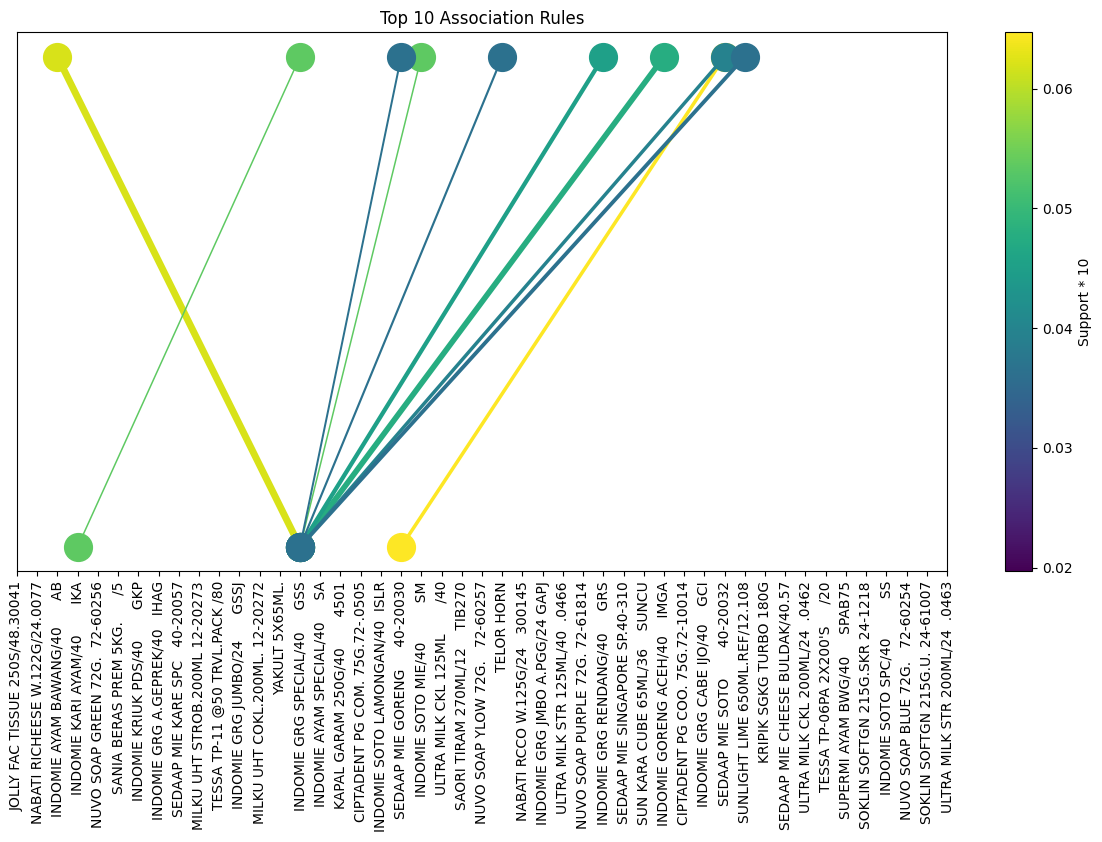

In [9]:
# Normalisasi nilai Support untuk colormap
import matplotlib as mpl

# Buat normalisasi
norm = mpl.colors.Normalize(vmin=rules_df['Support'].min() * 10, vmax=rules_df['Support'].max() * 10)
sm = mpl.cm.ScalarMappable(cmap='viridis', norm=norm)

# Atur ukuran plot
fig, ax = plt.subplots(figsize=(15, 7))  # Gunakan subplots untuk mengakses Axes

# Gambarkan garis antara item untuk setiap aturan
# Warnai setiap garis sesuai dengan nilai Support
for index, row in rules_df.head(10).iterrows():
    ax.plot(
        [row['FromN'], row['ToN']],
        [0, 1],
        'o-',
        c=plt.cm.viridis(norm(row['Support'] * 10)),
        markersize=20,
        lw=row['Confidence'] * 10
    )

# Tambahkan colorbar
sm.set_array([])  # Tetapkan array kosong karena hanya colormap yang digunakan
cb = fig.colorbar(sm, ax=ax)  # Tambahkan colorbar ke sumbu `ax`
cb.set_label('Support * 10')

# Tambahkan label ke xticks dan hapus yticks
ax.set_xticks(range(len(items)))
ax.set_xticklabels(items, rotation='vertical')
ax.set_yticks([])
ax.set_title('Top 10 Association Rules')
plt.show()